In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
os.chdir('..')

In [2]:
import pickle
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from modules.plotting_functions import periodic_table_heatmap
from modules.function import get_elem_count,pymatgen_comp, get_number_of_components, get_comp_count_over_bins, alt_read_gfa_dataset
import networkx as nx

In [3]:
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Times New Roman"

# Trends in dataset visualized

In [4]:
hardness_file_path = 'dataset/hardness.csv'
yield_str_file_path = 'dataset/yield_strength.csv'
phase_file_path = 'Files_from_GTDL_paper/gao_data.txt'
fig_location = 'figures'
hardness_df = pd.read_csv(hardness_file_path)
yield_str_df = pd.read_csv(yield_str_file_path)

## Periodic table heatmaps of elements in the GFA and HEA phase dataset

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

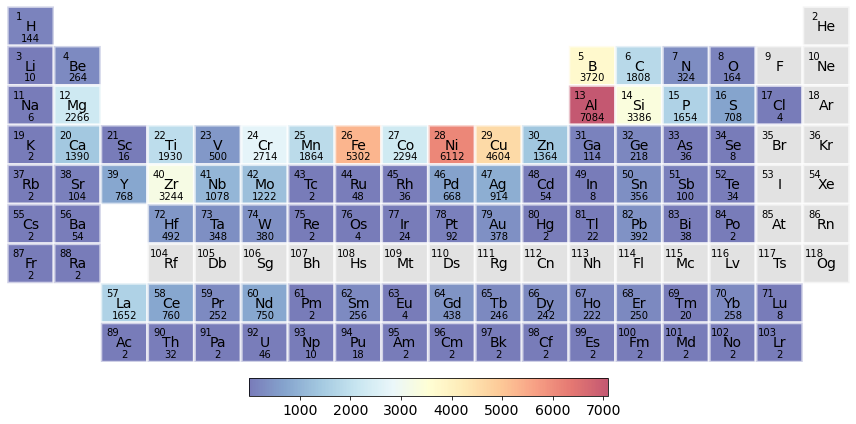

In [6]:
X, y , p = alt_read_gfa_dataset()
gfa_elem_count = get_elem_count(X)

periodic_table_heatmap(gfa_elem_count,blank_color='lightgrey',edge_color='white', value_format='%.0f',
                            cmap='RdYlBu_r')

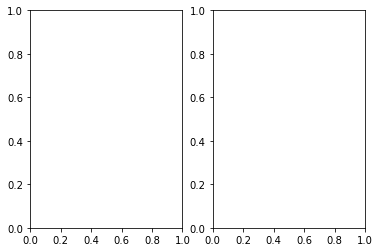

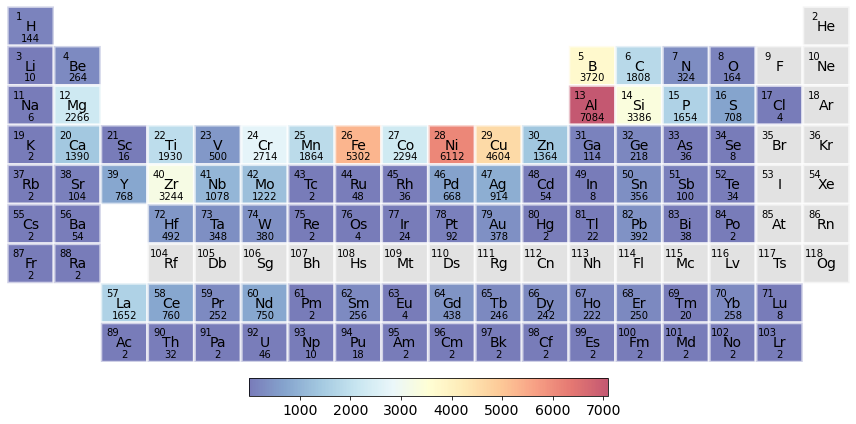

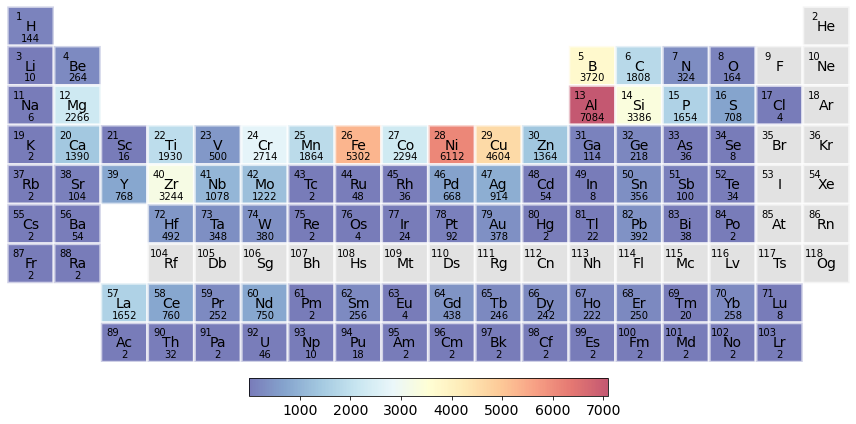

In [6]:
fig, subplots = plt.subplots(nrows=1, ncols=2)
for n, subplot in enumerate(subplots.flatten()):
    periodic_table_heatmap(gfa_elem_count,blank_color='lightgrey',edge_color='white', value_format='%.0f',
                            cmap='RdYlBu_r')

<module 'matplotlib.pyplot' from '/noether/s0/aqd5773/anaconda3/envs/representations/lib/python3.10/site-packages/matplotlib/pyplot.py'>

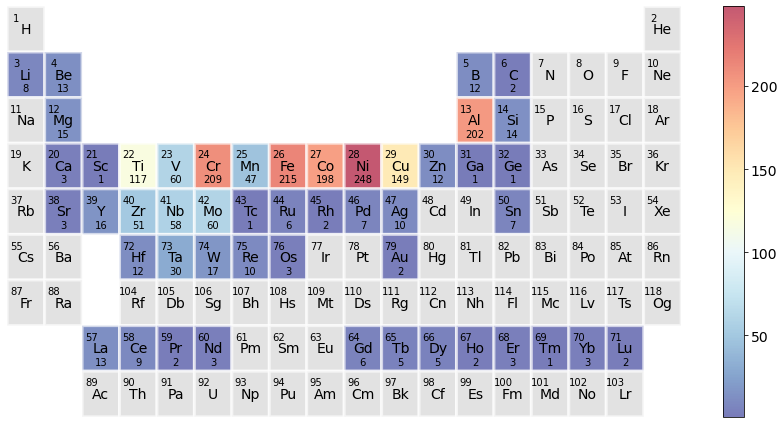

In [22]:
[x0,dataY]=pickle.load(open(phase_file_path, 'rb'))
comps = [y.split(' ')[1] for y in x0]
phase_elem_count = get_elem_count(comps)
periodic_table_heatmap(phase_elem_count,blank_color='lightgrey',edge_color='white', value_format='%.0f',
                            cmap='RdYlBu_r',save_name = fig_location+'/phase_elem_heatmap.pdf')

<module 'matplotlib.pyplot' from '/noether/s0/aqd5773/anaconda3/envs/representations/lib/python3.10/site-packages/matplotlib/pyplot.py'>

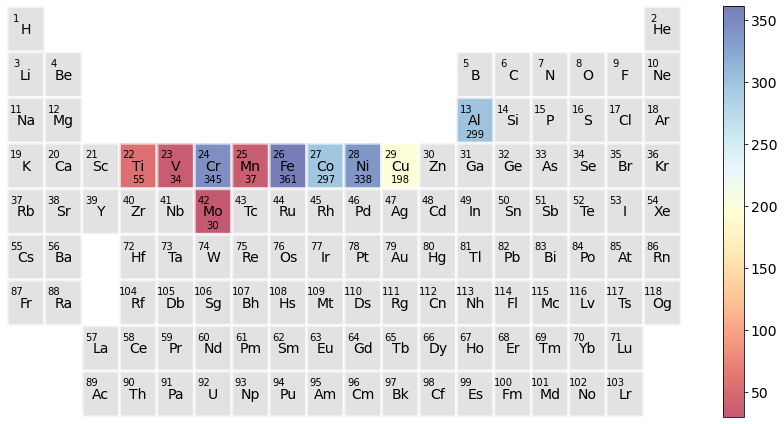

In [7]:
hardness_elem_count = get_elem_count(hardness_df['Composition'])
periodic_table_heatmap(hardness_elem_count,blank_color='lightgrey',edge_color='white', value_format='%.0f',
                            cmap='RdYlBu',save_name = fig_location+'/hardness_elem_heatmap.pdf')

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


<AxesSubplot:>

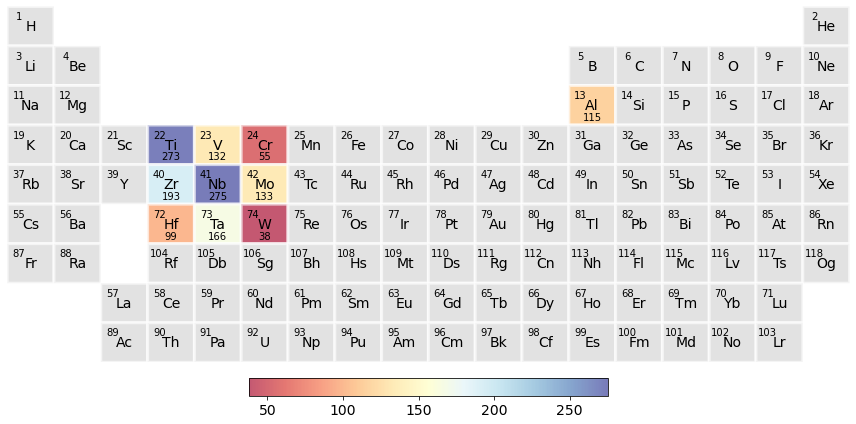

In [5]:
yield_elem_count = get_elem_count(yield_str_df['Composition'])
periodic_table_heatmap(yield_elem_count,blank_color='lightgrey',edge_color='white', value_format='%.0f',
                            cmap='RdYlBu',save_name = fig_location+'/yield_str_elem_heatmap.pdf')

## PCA components result

In [10]:
with open('misc/pca_components.pkl','rb') as fid:
    component_dict = pickle.load(fid)
with open('misc/pca_results.json','r') as fid:
    pca_dict = json.load(fid)

findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


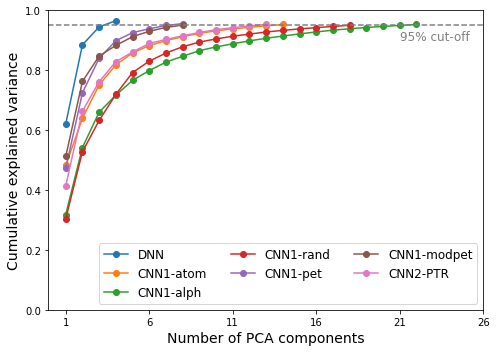

In [11]:
methods = ['dense','atomic','random','random-tr','pettifor','mod_pettifor','PTR']
names = ['DNN','CNN1-atom','CNN1-alph','CNN1-rand','CNN1-pet','CNN1-modpet','CNN2-PTR']

fig, ax  = plt.subplots(figsize = (7,5))
for i, method in enumerate(methods):
    explained_var = np.array(pca_dict[method])
    ind = component_dict[method]
    ax.plot(np.cumsum(explained_var)[:ind+1],marker = 'o', label = names[i])
ax.axhline(y=0.95, color='grey', linestyle='dashed')
ax.set_yticks(np.arange(0,1.2,0.2), fontsize = 14)
ax.set_xticks(np.arange(0,26,5), fontsize = 14)
ax.set_xticklabels(np.arange(1,27,5))
ax.text(20, 0.9, '95% cut-off', color = 'grey', fontsize=12)
ax.set_xlabel('Number of PCA components',fontsize=14)
ax.set_ylabel('Cumulative explained variance', fontsize = 14)
plt.legend(ncol=3,loc = 'lower right', fontsize=12)
plt.tight_layout()
plt.savefig(os.path.join(fig_location,'explained_variance.pdf'))

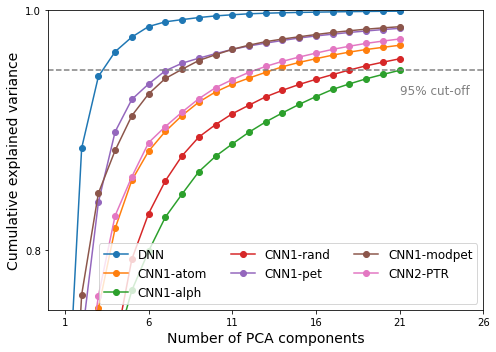

In [12]:
methods = ['dense','atomic','random','random-tr','pettifor','mod_pettifor','PTR']
names = ['DNN','CNN1-atom','CNN1-alph','CNN1-rand','CNN1-pet','CNN1-modpet','CNN2-PTR']


fig, ax  = plt.subplots(figsize = (7,5))
for i, method in enumerate(methods):
    explained_var = np.array(pca_dict[method])
    ind = 20
    ax.plot(np.cumsum(explained_var)[:ind+1],marker = 'o', label = names[i])
ax.axhline(y=0.95, color='grey', linestyle='dashed')
ax.set_yticks(np.arange(0,1.2,0.2), fontsize = 14)
ax.set_xticks(np.arange(0,26,5), fontsize = 14)
ax.set_xticklabels(np.arange(1,27,5))
ax.set(ylim=[0.75, 1])
ax.text(20, 0.93, '95% cut-off', color = 'grey', fontsize=12)
ax.set_xlabel('Number of PCA components',fontsize=14)
ax.set_ylabel('Cumulative explained variance', fontsize = 14)
plt.legend(ncol=3,loc = 'lower right', fontsize=12)
plt.tight_layout()

## Distribution of property values

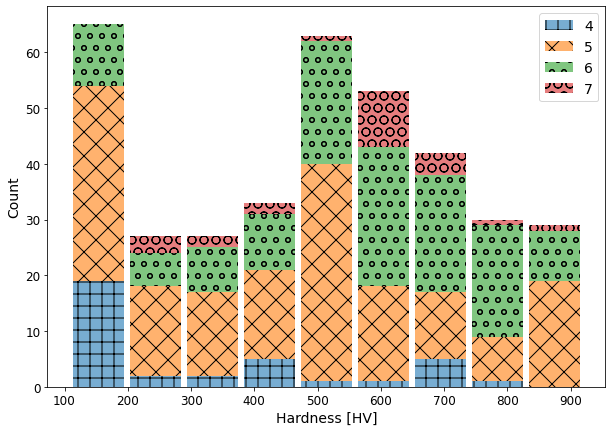

In [5]:
hardness_df['n_eles'] = get_number_of_components(hardness_df['Composition'])
min_eles = hardness_df['n_eles'].min()
max_eles = hardness_df['n_eles'].max()
slices = []
for i in np.arange(min_eles, max_eles+1):
    slices.append(hardness_df['HV'][hardness_df['n_eles']==i].values)

_,bins = get_comp_count_over_bins(hardness_df['HV'].values,10)

fig,ax = plt.subplots(figsize=(10,7))

n,bins,patches = plt.hist(slices,bins=bins-0.5,rwidth=0.9,stacked=True,alpha=0.6)

hatches = ['+', 'x', 'o', 'O', '.', '*','/', '\\', '|', '-', ]
for patch_set, hatch in zip(patches, hatches):
    for patch in patch_set.patches:
        patch.set_hatch(hatch)
#plt.yticks(np.arange(0,80,10),fontsize=12)
#plt.xticks(np.arange(100,1000,100),fontsize=12)
plt.legend(np.arange(min_eles, max_eles+1),fontsize=14)
plt.xlabel('Hardness [HV]',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(fig_location+'/hardness_dist.pdf',dpi=300)

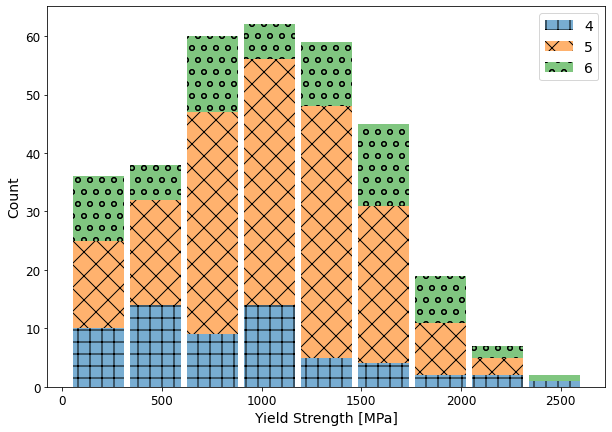

In [8]:
yield_str_df['n_eles'] = get_number_of_components(yield_str_df['Composition'])
min_eles = yield_str_df['n_eles'].min()
max_eles = yield_str_df['n_eles'].max()
slices = []
for i in np.arange(min_eles, max_eles+1):
    slices.append(yield_str_df['Yield Strength'][yield_str_df['n_eles']==i].values)

_,bins = get_comp_count_over_bins(yield_str_df['Yield Strength'].values,10)

fig,ax = plt.subplots(figsize=(10,7))

n,bins,patches = plt.hist(slices,bins=bins-0.5,rwidth=0.9,stacked=True,alpha=0.6)

hatches = ['+', 'x', 'o', 'O', '.', '*','/', '\\', '|', '-', ]
for patch_set, hatch in zip(patches, hatches):
    for patch in patch_set.patches:
        patch.set_hatch(hatch)
#plt.yticks(np.arange(0,80,10),fontsize=12)
#plt.xticks(np.arange(100,1000,100),fontsize=12)
plt.legend(np.arange(min_eles, max_eles+1),fontsize=14)
plt.xlabel('Yield Strength [MPa]',fontsize=14)
plt.ylabel('Count',fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.savefig(fig_location+'/yield_strength_dist.pdf',dpi=300)

## Mcnemar test vizualizations

In [5]:
result_file_loc = 'results/results.json'
with open(result_file_loc,'r') as fid:
    sup_result_dict = json.load(fid)

### GFA dataset

In [6]:
with open('results/representation_stats.json','rb') as fid:
        data_file = json.load(fid)
mean_list = []
std_list = []
for i, k in enumerate(data_file.keys()):
        stat_arr = np.array(list(data_file[k].values()))
        mean_list.append(stat_arr.mean(axis=0))
        std_list.append(stat_arr.std(axis=0))
mean_list = np.array(mean_list).T
std_list = np.array(std_list).T

In [7]:
from itertools import combinations
from scipy.stats import ttest_ind, ttest_rel
methods = list(data_file.keys())
compare_keys = combinations(methods,2)
zero = np.eye(len(methods))
for key in compare_keys:
    a,b = key
    ind1 = np.argwhere(np.array(methods)==a)
    ind2 = np.argwhere(np.array(methods)==b)
    a_score = np.array(list(data_file[a].values()))[:,-1]
    b_score = np.array(list(data_file[b].values()))[:,-1]
    zero[ind1,ind2] = ttest_rel(a_score,b_score)[-1]
    #print(ttest_ind(a_score,b_score)[-1])

/tmp/ipykernel_2151451/2800053299.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation = 45, fontsize = 14)
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans.


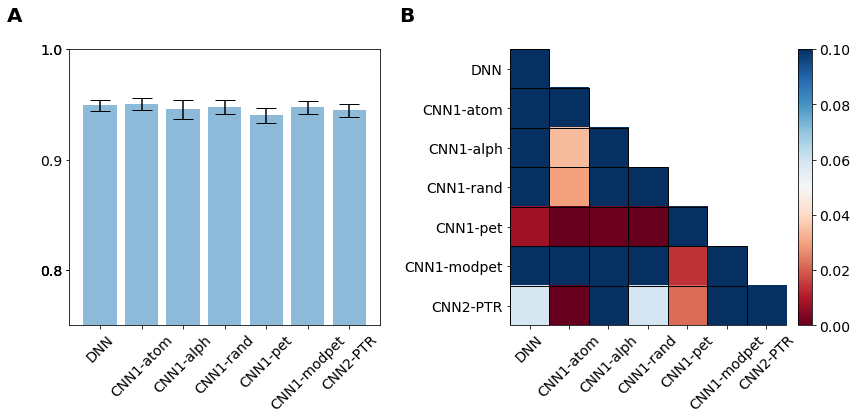

In [8]:
from matplotlib import cm as cm
import matplotlib.pyplot as plt
import matplotlib
methods = ['dense','atomic','random','random-tr','pettifor','mod_pettifor','PTR']
names = sup_result_dict['mcnemar_gfa']['names']
#zero = np.array(sup_result_dict['mcnemar_gfa']['p_vals'])
mask =  np.tri(zero.T.shape[0], k=-1)
mask =  np.tri(zero.T.shape[0], k=-1)
A = np.ma.array(zero, mask=mask).T
truth = np.where(mask == 1)

def highlight_cell(x,y, ax=None, **kwargs):
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect
fig, axs = plt.subplot_mosaic("AB", figsize=(12,6))

for n, (key, ax) in enumerate(axs.items()):
    if n == 0:
        ax.bar(methods, mean_list[-1], yerr = std_list[-1],align='center', alpha=0.5, ecolor='black', capsize=10)
        ax.set(ylim=[0.75, 1])
        ax.set_xticklabels(names, rotation = 45, fontsize = 14)
        ax.set_yticks(np.round(np.arange(0.75,1.01,0.05),1), fontsize = 14, labels=np.round(np.arange(0.75,1.01,0.05),1))
        ax.text(-0.2, 1.1, key, transform=ax.transAxes, size=20, weight='bold')

    if n == 1:
        ax.set_xticks(np.arange(0, len(names), 1))
        ax.set_yticks(np.arange(0, len(names), 1))

        cmap = cm.get_cmap('RdBu')
        im = ax.imshow(A, cmap = cmap, vmin = 0, vmax = 0.1)
        for i in range(len(truth[0])):
            highlight_cell(truth[1][i],truth[0][i])
        diag = [0,1,2,3,4,5]
        for k in diag:
            highlight_cell(k,k)
        ax.set_xticklabels(names, rotation = 45, fontsize = 14)
        ax.set_yticklabels(names, fontsize = 14)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(False)
        cb = plt.colorbar(im,fraction=0.046, pad=0.04)
        for t in cb.ax.get_yticklabels():
            t.set_fontsize(14)
        ax.text(-0.4, 1.1, key, transform=ax.transAxes, 
            size=20, weight='bold')
    
plt.tight_layout()

plt.savefig(os.path.join(fig_location,'gfa_results.pdf'),bbox_inches = "tight")

### HEA phase prediction

In [34]:
with open('misc/phase_prediction_stats.json','r') as fid:
    phase_results_dict = json.load(fid)
names = phase_results_dict['names']
mean_f1_score = phase_results_dict['mean_f1_score']
std_f1_score = phase_results_dict['std_f1_score']

/tmp/ipykernel_1240690/3399580556.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation = 45, fontsize = 14)


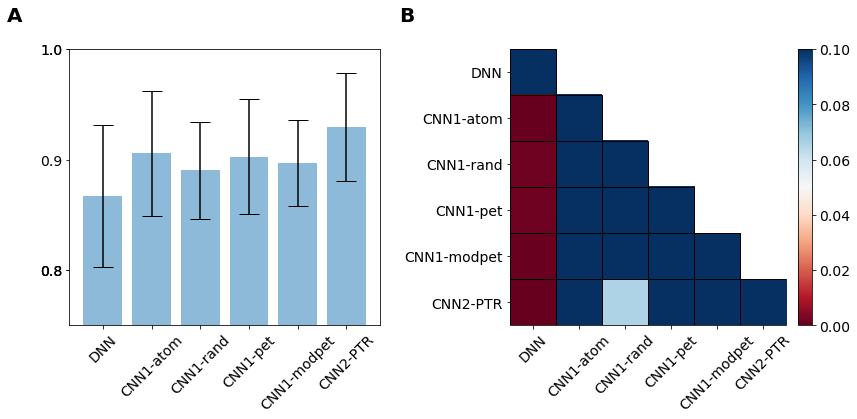

In [35]:
from matplotlib import cm as cm
import matplotlib.pyplot as plt
import matplotlib
names = sup_result_dict['mcnemar_hea_phase']['names']
zero = np.array(sup_result_dict['mcnemar_hea_phase']['p_vals'])
mask =  np.tri(zero.T.shape[0], k=-1)
mask =  np.tri(zero.T.shape[0], k=-1)
A = np.ma.array(zero, mask=mask).T
truth = np.where(mask == 1)

def highlight_cell(x,y, ax=None, **kwargs):
    rect = plt.Rectangle((x-.5, y-.5), 1,1, fill=False, **kwargs)
    ax = ax or plt.gca()
    ax.add_patch(rect)
    return rect

fig, axs = plt.subplot_mosaic("AB", figsize=(12,6))

for n, (key, ax) in enumerate(axs.items()):
    if n == 0:
        ax.bar(methods, mean_f1_score, yerr = std_f1_score,align='center', alpha=0.5, ecolor='black', capsize=10)
        ax.set(ylim=[0.75, 1])
        ax.set_xticklabels(names, rotation = 45, fontsize = 14)
        ax.set_yticks(np.round(np.arange(0.75,1.01,0.05),1), fontsize = 14, labels=np.round(np.arange(0.75,1.01,0.05),1))
        ax.text(-0.2, 1.1, key, transform=ax.transAxes, 
            size=20, weight='bold')

    if n == 1:
        ax.set_xticks(np.arange(0, len(names), 1))
        ax.set_yticks(np.arange(0, len(names), 1))

        cmap = cm.get_cmap('RdBu')
        im = ax.imshow(A, cmap = cmap, vmin = 0, vmax = 0.1)
        for i in range(len(truth[0])):
            highlight_cell(truth[1][i],truth[0][i])
        diag = [0,1,2,3,4,5]
        for k in diag:
            highlight_cell(k,k)
        ax.set_xticklabels(names, rotation = 45, fontsize = 14)
        ax.set_yticklabels(names, fontsize = 14)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(True)
        ax.spines['left'].set_visible(False)
        cb = plt.colorbar(im,fraction=0.046, pad=0.04)
        for t in cb.ax.get_yticklabels():
            t.set_fontsize(14)
        ax.text(-0.4, 1.1, key, transform=ax.transAxes, 
            size=20, weight='bold')
    
plt.tight_layout()

plt.savefig(os.path.join(fig_location,'hea_phase_results.pdf'),bbox_inches = "tight")

### fixed components

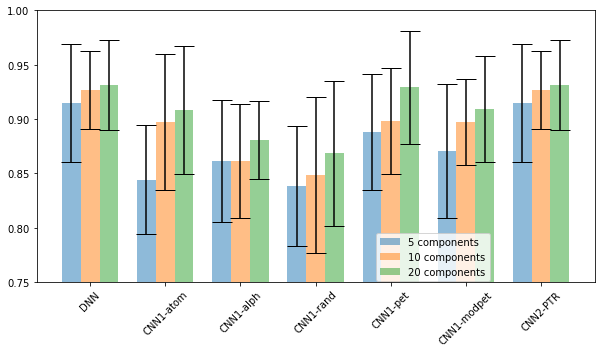

In [9]:
with open('results/phase_prediction_fixed_pca.json','r') as fid:
    ind_dict = json.load(fid)
names = ind_dict['names']
keys = ['5','10','20']
fig,ax = plt.subplots(figsize = (10,5))
barWidth = 0.25
mean_scores = []
std_scores = []
for i, ind in enumerate(keys):
    temp_dict = ind_dict[ind]
    mean_score_list=[]
    std_score_list = []
    mean_score_list = (np.array(temp_dict['mean'])[:,-2])
    std_score_list = (np.array(temp_dict['std'])[:,-2])
    mean_scores.append(mean_score_list)
    std_scores.append(std_score_list)

mean_scores = np.array(mean_scores)
std_scores = np.array(std_scores)
x =np.arange(mean_scores.shape[1])
for i in range(mean_scores.shape[0]):
    x_mod = i*barWidth + x
    ax.bar(x_mod, mean_scores[i,:], yerr = std_scores[i,:],align='center', alpha=0.5, ecolor='black', 
    capsize=10, width=barWidth, label = f'{keys[i]} components')
#ax.set_title(''.format(ind))
ax.set_xticks(np.arange(0.25,len(x)+0.25,1),labels = names, rotation=45)
ax.set(ylim=[0.75, 1])
ax.legend(bbox_to_anchor=(0.6, 0.2))

## different variances

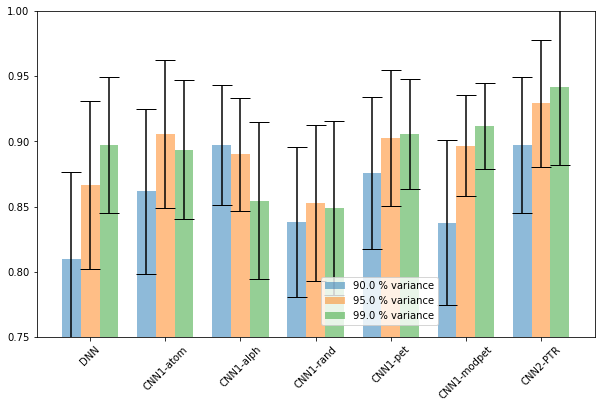

In [8]:
with open('results/phase_prediction_variance_pca.json','r') as fid:
    var_dict = json.load(fid)
names = var_dict['names']
keys = ['0.9','0.95','0.99']
fig,ax = plt.subplots(figsize = (10,6))
barWidth = 0.25
mean_scores = []
std_scores = []
for i, ind in enumerate(keys):
    temp_dict = var_dict[ind]
    mean_score_list=[]
    std_score_list = []
    mean_score_list = (np.array(temp_dict['mean'])[:,-2])
    std_score_list = (np.array(temp_dict['std'])[:,-2])
    mean_scores.append(mean_score_list)
    std_scores.append(std_score_list)

mean_scores = np.array(mean_scores)
std_scores = np.array(std_scores)
x =np.arange(mean_scores.shape[1])
for i in range(mean_scores.shape[0]):
    x_mod = i*barWidth + x
    ax.bar(x_mod, mean_scores[i,:], yerr = std_scores[i,:],align='center', alpha=0.5, ecolor='black', 
    capsize=10, width=barWidth, label = f'{float(keys[i])*100} % variance')
#ax.set_title(''.format(ind))
ax.set_xticks(np.arange(0.25,len(x)+0.25,1),labels = names, rotation=45)
ax.set(ylim=[0.75, 1])
ax.legend(bbox_to_anchor=(0.5, 0.2))

## Network graphs for datasets

HEA phase

In [78]:
from itertools import permutations, combinations
[x0,dataY]=pickle.load(open(phase_file_path, 'rb'))
comps = [y.split(' ')[1] for y in x0]
phase_comps = pymatgen_comp(comps)
hardness_elem_count = get_elem_count(phase_comps)
edges = {}
for c in phase_comps:
    el_list = list(c.get_el_amt_dict().keys())
    if len(el_list)>1:
        all_perm = combinations(el_list,2)
        for p in all_perm:
            if p not in edges.keys():
                edges[p] = 1
            else:
                edges[p] += 1

In [88]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(hardness_elem_count.keys())
for k in edges.keys():
    G.add_edge(k[0], k[1],weight = edges[k])

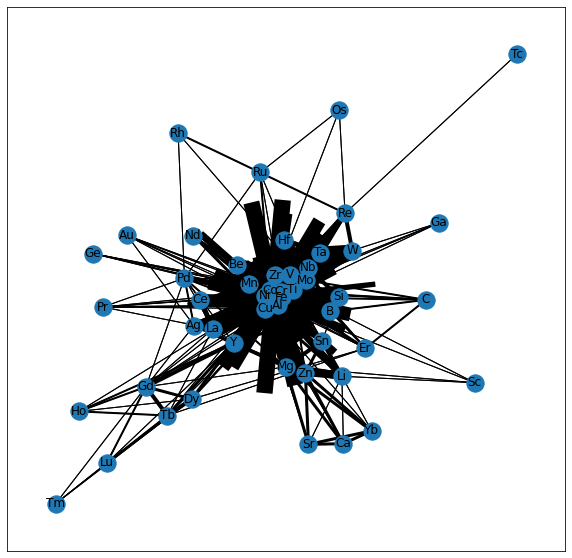

In [90]:
fig,ax = plt.subplots(figsize=(10,10))
pos = nx.spring_layout(G, seed=0)
nx.draw_networkx(G, pos)
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])
#ax = nx.draw(G, with_labels=True, font_weight='bold',font_color='black', node_size = np.array(list(hardness_elem_count.values()))*5)

### hardness

In [107]:
from itertools import permutations, combinations
hardness_comps = pymatgen_comp(hardness_df['Composition'])
hardness_elem_count = get_elem_count(hardness_comps)
edges = {}
for c in hardness_comps:
    el_list = list(c.get_el_amt_dict().keys())
    if len(el_list)>1:
        all_perm = combinations(el_list,2)
        for p in all_perm:
            if p not in edges.keys():
                edges[p] = 1
            else:
                edges[p] += 1
for k in edges:
    edges[k]= (edges[k]/len(hardness_comps))

In [108]:
import networkx as nx
G = nx.Graph()
G.add_nodes_from(hardness_elem_count.keys())
for k in edges.keys():
    G.add_edge(k[0], k[1], weight = edges[k])

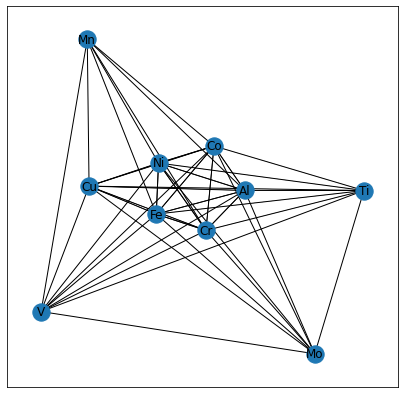

In [109]:
fig,ax = plt.subplots(figsize=(7,7))
pos = nx.spring_layout(G, seed=0)
nx.draw_networkx(G, pos)
for edge in G.edges(data='weight'):
    nx.draw_networkx_edges(G, pos, edgelist=[edge], width=edge[2])


In [110]:
periodic_table_file = 'dataset/periodic_table.csv'
periodic_df = pd.read_csv(periodic_table_file)
atomic_number_order = periodic_df['Symbol'].values[:103]

array(['Co', 'Pm', 'Li', 'Te', 'Hf', 'Ir', 'Cl', 'Ho', 'La', 'In', 'Cs',
       'Cm', 'Es', 'Si', 'O', 'Ga', 'V', 'Mn', 'Se', 'F', 'Ru', 'Os',
       'Be', 'W', 'Rn', 'Re', 'N', 'Pd', 'Bk', 'Au', 'Eu', 'Bi', 'Th',
       'Np', 'Sm', 'Ni', 'K', 'Pa', 'Nd', 'At', 'Lr', 'He', 'Gd', 'Tc',
       'Mo', 'B', 'S', 'Ar', 'Nb', 'Y', 'C', 'Am', 'Xe', 'H', 'Br', 'Cu',
       'Ba', 'Sb', 'Mg', 'Kr', 'Cr', 'I', 'Na', 'Ge', 'Tm', 'Ce', 'Hg',
       'Pu', 'As', 'Fr', 'P', 'Tl', 'Ca', 'Zn', 'Sn', 'Md', 'No', 'Yb',
       'Sc', 'Cf', 'Ta', 'Pt', 'Fe', 'Sr', 'Pb', 'Ag', 'Zr', 'Dy', 'Pr',
       'Al', 'U', 'Ac', 'Lu', 'Ra', 'Rb', 'Ti', 'Po', 'Ne', 'Fm', 'Er',
       'Tb', 'Cd', 'Rh'], dtype=object)